<a href="https://colab.research.google.com/github/AlfonsoRafel/Posgrado-IA---UBA/blob/master/06.%20Computer%20Vision%20II/CVII_Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimento para ver el efecto de una capa POOL 

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [ ]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model_a.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_67 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
___________________________________________

In [ ]:
model_b.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
flatten_23 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_70 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 37s 43ms/step - loss: 1.2424 - accuracy: 0.5736 - val_loss: 0.5547 - val_accuracy: 0.8040
Epoch 2/3
860/860 [==============================] - 39s 45ms/step - loss: 0.5402 - accuracy: 0.8023 - val_loss: 0.4715 - val_accuracy: 0.8356
Epoch 3/3
860/860 [==============================] - 38s 45ms/step - loss: 0.4839 - accuracy: 0.8262 - val_loss: 0.5243 - val_accuracy: 0.8138


In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 26s 29ms/step - loss: 1.3960 - accuracy: 0.5448 - val_loss: 0.5908 - val_accuracy: 0.7868
Epoch 2/3
860/860 [==============================] - 24s 28ms/step - loss: 0.5680 - accuracy: 0.7925 - val_loss: 0.4866 - val_accuracy: 0.8278
Epoch 3/3
860/860 [==============================] - 24s 28ms/step - loss: 0.4966 - accuracy: 0.8185 - val_loss: 0.4623 - val_accuracy: 0.8350


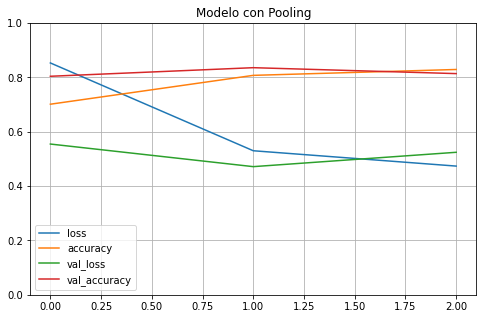

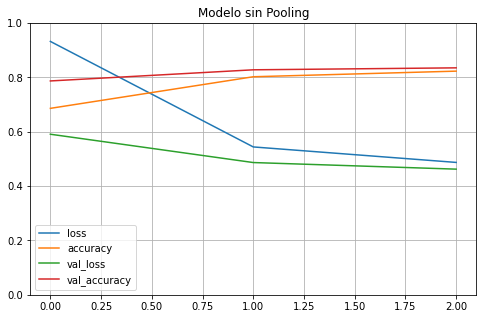

In [ ]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Modelo con Pooling')
plt.show()

pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Modelo sin Pooling')
plt.show()

In [ ]:
ev_a = model_a.evaluate(X_test_n, y_test)
model_a_pred = model_a.predict(X_test_n)

313/313 [==============================] - 3s 9ms/step - loss: 0.5575 - accuracy: 0.7961


In [ ]:
ev_b = model_b.evaluate(X_test_n, y_test)
model_b_pred = model_b.predict(X_test_n)

313/313 [==============================] - 2s 6ms/step - loss: 0.5125 - accuracy: 0.8039


### Pooling vs No Pooling - 2 Capas

Se entrena nuevamente ambas redes (con y sin pool) agregando una capa más. Para el caso del Modelo A se agrega una capa convolucional más una capa de MaxPooling. Para el caso del Modelo B se agrega sólo una capa convolucional pero con stride = 2 de manera de preservar la cantidad de parámetros entre modelos. Para lograr conseguir esto se modifica el padding de 'valid' a 'same'.

In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='same', activation='relu'))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model_a.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 300)               470700    
_________________________________________________________________
dense_73 (Dense)             (None, 100)             

In [ ]:
model_b.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
flatten_25 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 300)               470700    
_________________________________________________________________
dense_76 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1010      
Total params: 511,378
Trainable params: 511,378
Non-trainable params: 0
_______________________________________________

In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 56s 65ms/step - loss: 1.4002 - accuracy: 0.5272 - val_loss: 1.0538 - val_accuracy: 0.6334
Epoch 2/3
860/860 [==============================] - 54s 63ms/step - loss: 0.6132 - accuracy: 0.7738 - val_loss: 0.6419 - val_accuracy: 0.7448
Epoch 3/3
860/860 [==============================] - 55s 63ms/step - loss: 0.5105 - accuracy: 0.8101 - val_loss: 0.5764 - val_accuracy: 0.7964


In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 20s 23ms/step - loss: 1.5751 - accuracy: 0.4454 - val_loss: 0.6223 - val_accuracy: 0.7778
Epoch 2/3
860/860 [==============================] - 19s 23ms/step - loss: 0.5844 - accuracy: 0.7884 - val_loss: 0.5227 - val_accuracy: 0.8212
Epoch 3/3
860/860 [==============================] - 20s 23ms/step - loss: 0.5042 - accuracy: 0.8163 - val_loss: 0.6154 - val_accuracy: 0.7548


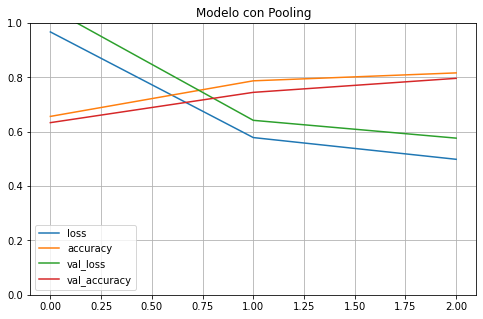

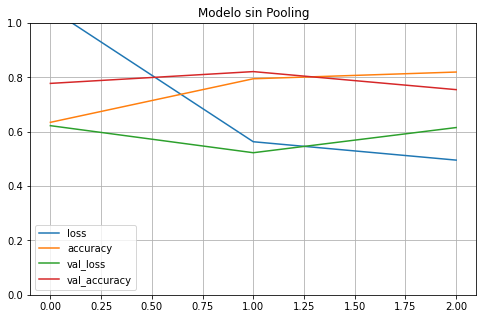

In [ ]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Modelo con Pooling')
plt.show()

pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Modelo sin Pooling')
plt.show()

In [ ]:
ev_a = model_a.evaluate(X_test_n, y_test)
model_a_pred = model_a.predict(X_test_n)

313/313 [==============================] - 3s 10ms/step - loss: 0.6019 - accuracy: 0.7855


In [ ]:
ev_b = model_b.evaluate(X_test_n, y_test)
model_b_pred = model_b.predict(X_test_n)

313/313 [==============================] - 2s 5ms/step - loss: 0.6665 - accuracy: 0.7413


### Comentarios

* Pooling vs No Pooling 1 Capa: el modelo con Pooling aprende más rapido que el modelo sin. Ambos generalizan bien ante el set de test.
* Pooling vs No Pooling 2 Capas: al aumentar la profundidad, el modelo sin pooling logra aprender más rápido, pero sufre de overfitting y no lo generalizar tan bien con el modelo con pooling.